#### Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the dataset

In [67]:
df= pd.read_excel(r"C:\Users\udayk\Downloads\Sample_-_Superstore.xls")

In [68]:
df.columns = df.columns.str.replace(" ","_")
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace("-","")

In [69]:
df.columns 

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'subcategory',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [72]:
df.drop("row_id",axis=1,inplace=True)
df.drop("order_id",axis=1,inplace=True)
df.drop("customer_id",axis=1,inplace=True)

In [73]:
df.head(3)

,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


#### Missing values

In [74]:
df.isna().sum()

order_date       0
ship_date        0
ship_mode        0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
subcategory      0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

#### Duplicated values

In [75]:
df.duplicated().sum()

1

In [76]:
df.drop_duplicates(inplace=True)

In [77]:
df.duplicated().sum()

0

#### Checking for Structural Errors

In [78]:
obj = df.select_dtypes(include="object")

In [79]:
for i in obj:
    print("*"*10, i, "*"*10)
    print(obj[i].agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', obj[i].value_counts())
    print()

********** ship_mode **********
count                                                   9993
nunique                                                    4
unique     [Second Class, Standard Class, First Class, Sa...
Name: ship_mode, dtype: object
Value Counts: 
 ship_mode
Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

********** customer_name **********
count                                                   9993
nunique                                                  793
unique     [Claire Gute, Darrin Van Huff, Sean O'Donnell,...
Name: customer_name, dtype: object
Value Counts: 
 customer_name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: count, Length: 793, dtype: int64


In [80]:
df.dtypes

order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
subcategory              object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

### Univariate Analysis for Numerical columns

* H-histogram
* B-Boxplot
* D-Density

Histogram

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

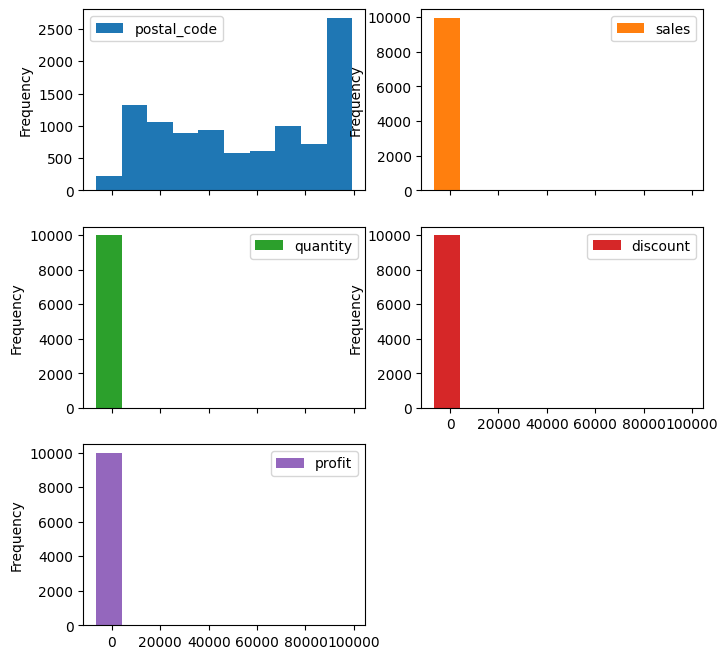

In [81]:
df.plot(kind="hist",subplots=True,layout= (3,2),figsize=(8,8))

Boxplot

postal_code       Axes(0.125,0.653529;0.352273x0.226471)
sales          Axes(0.547727,0.653529;0.352273x0.226471)
quantity          Axes(0.125,0.381765;0.352273x0.226471)
discount       Axes(0.547727,0.381765;0.352273x0.226471)
profit                Axes(0.125,0.11;0.352273x0.226471)
dtype: object

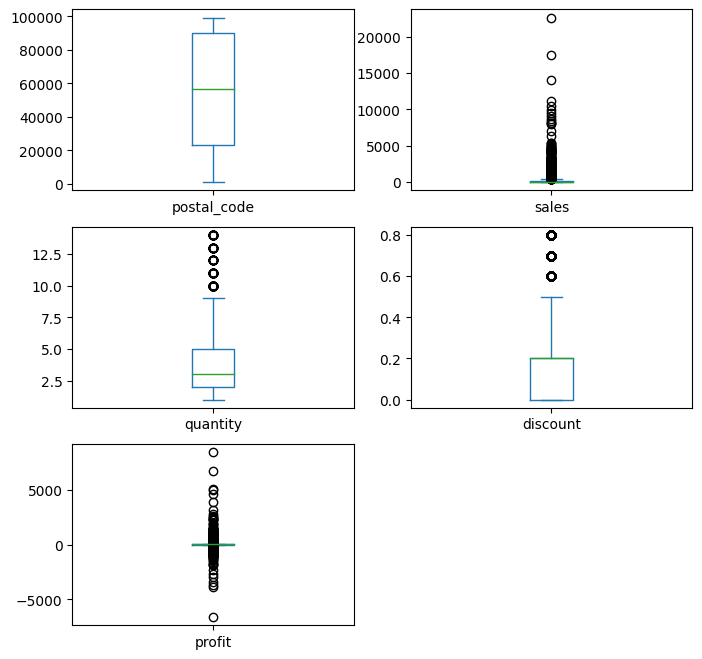

In [82]:
df.plot(kind="box",subplots=True,layout= (3,2),figsize=(8,8))

conclusion:

1. From boxplot representation,sales,quantity,discount,profit are having the outliers but they can't be replaced.
2. Because the data is crucial for the analysis.

KDE / Density plot

<Axes: ylabel='Density'>

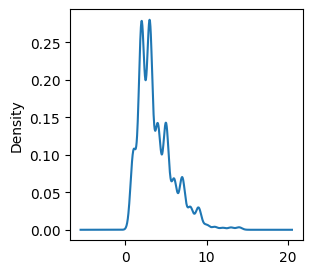

In [84]:
df["quantity"].plot(kind="kde",figsize=(3,3))

<Axes: ylabel='Density'>

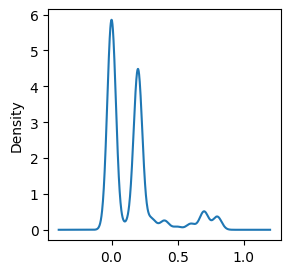

In [85]:
df["discount"].plot(kind="kde",figsize=(3,3))

<Axes: ylabel='Density'>

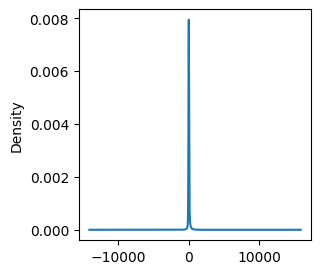

In [86]:
df["profit"].plot(kind="kde",figsize=(3,3))

<Axes: ylabel='Density'>

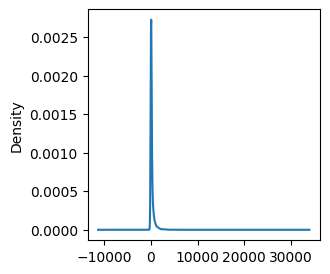

In [87]:
df["sales"].plot(kind="kde",figsize=(3,3))

### Univariate Analysis for categorical columns

* C-Countplot
* B- Barchart
* P- Piechart

In [88]:
obj = df.select_dtypes(include="object")
obj.columns

Index(['ship_mode', 'customer_name', 'segment', 'country', 'city', 'state',
       'region', 'product_id', 'category', 'subcategory', 'product_name'],
      dtype='object')

Bar Chart

<Axes: xlabel='ship_mode'>

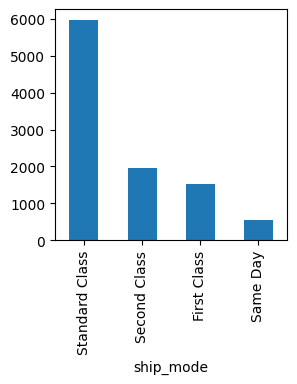

In [90]:
df["ship_mode"].value_counts().plot(kind="bar",figsize=(3,3))

<Axes: xlabel='segment'>

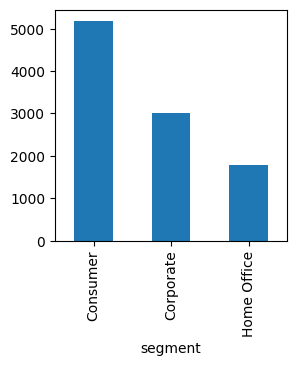

In [91]:
df["segment"].value_counts().plot(kind="bar",figsize=(3,3))

<Axes: xlabel='region'>

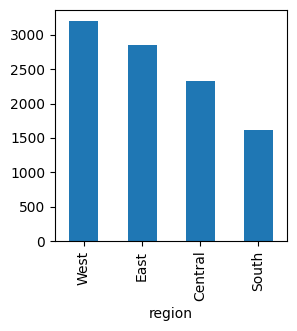

In [92]:
df["region"].value_counts().plot(kind="bar",figsize=(3,3))

<Axes: xlabel='category'>

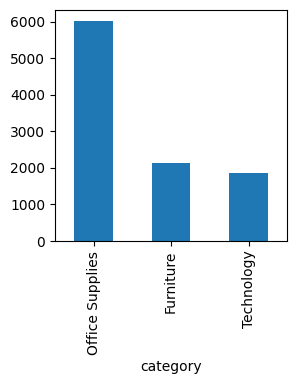

In [93]:
df["category"].value_counts().plot(kind="bar",figsize=(3,3))

Count Plot

<Axes: xlabel='ship_mode', ylabel='count'>

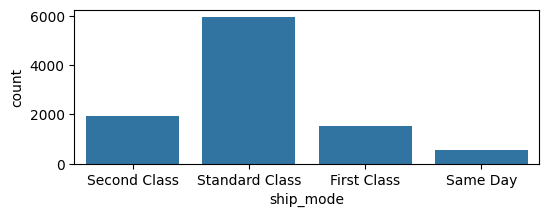

In [94]:
plt.figure(figsize=(6,2))
sns.countplot(data= df,x= "ship_mode")

<Axes: xlabel='segment', ylabel='count'>

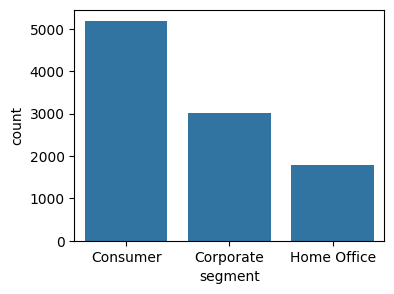

In [95]:
plt.figure(figsize=(4,3))
sns.countplot(data= df,x= "segment")

<Axes: xlabel='region', ylabel='count'>

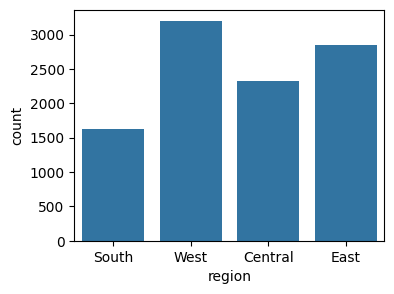

In [96]:
plt.figure(figsize=(4,3))
sns.countplot(data= df,x= "region")

<Axes: xlabel='category', ylabel='count'>

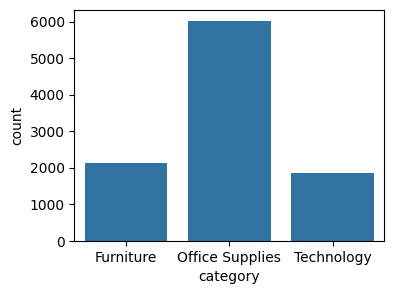

In [97]:
plt.figure(figsize=(4,3))
sns.countplot(data= df,x= "category")

Pie Chart

<Axes: ylabel='count'>

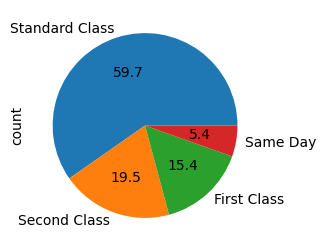

In [98]:
(df["ship_mode"].value_counts()/len(df["region"])).plot(kind="pie",autopct="%1.1f",figsize=(3,3))

<Axes: ylabel='count'>

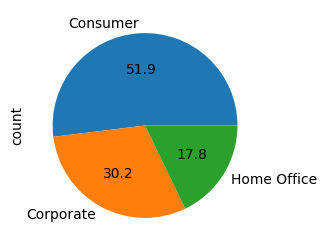

In [99]:
(df["segment"].value_counts()/len(df["region"])).plot(kind="pie",autopct="%1.1f",figsize=(3,3))

<Axes: ylabel='count'>

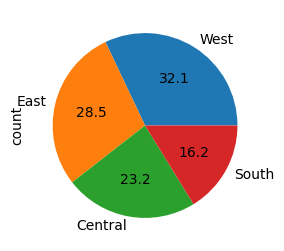

In [100]:
(df["region"].value_counts()/len(df["region"])).plot(kind="pie",autopct="%1.1f",figsize=(3,3))

<Axes: ylabel='count'>

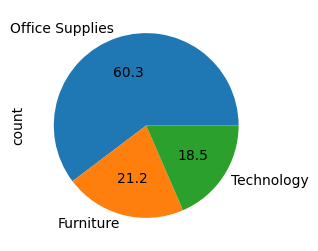

In [101]:
(df["category"].value_counts()/len(df["region"])).plot(kind="pie",autopct="%1.1f",figsize=(3,3))

### Bivariate Analysis
1. Categorical vs categorical
* crosstab,stacked/group bar,count plot

2. Categorical vs Numerical
* Line plot,groupby,pivot table,Bar chart

3. Numerical vs Numerical
* scatter plot,correlation

#### 1. Categorcal vs Categorcal

crosstab

In [102]:
pd.crosstab(df["country"],df["segment"])

segment,Consumer,Corporate,Home Office
country,,,
United States,5191,3020,1782


conclusion:
1. In US,5191 products are ordered by the consumers from store which is the highest compare to other segment.
2. In second place,3020 products are ordered by customers for corporate and followed by 1782 products are ordered for Home office.

In [103]:
pd.crosstab(df["ship_mode"],df["category"])

category,Furniture,Office Supplies,Technology
ship_mode,,,
First Class,327,910,301
Same Day,119,326,98
Second Class,427,1152,366
Standard Class,1247,3638,1082


conclusion:
1. For all types of categories,the standard class is first preferred as shipmode.
2. followed by standard class, second class,first class and same day are preferred

countplot

<Axes: xlabel='country', ylabel='count'>

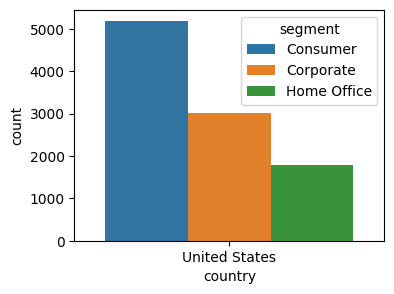

In [104]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x="country",hue="segment")

<Axes: xlabel='ship_mode', ylabel='count'>

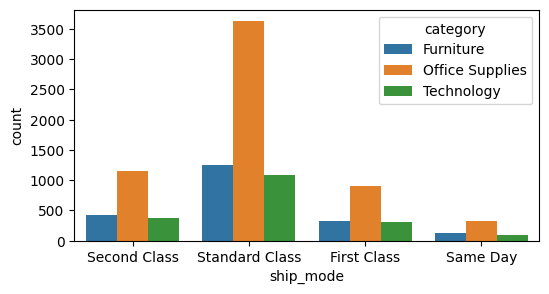

In [105]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x="ship_mode",hue="category")

#### 2. Categorical vs Numerical

Line plot

<Axes: xlabel='order_date'>

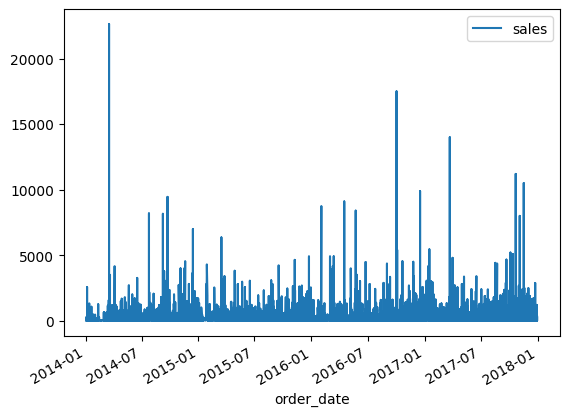

In [106]:
df.plot(kind="line",x="order_date",y="sales")

conclusion:
1. on 2014-03-18,the highest sales are recorded around 22500.

<Axes: xlabel='order_date'>

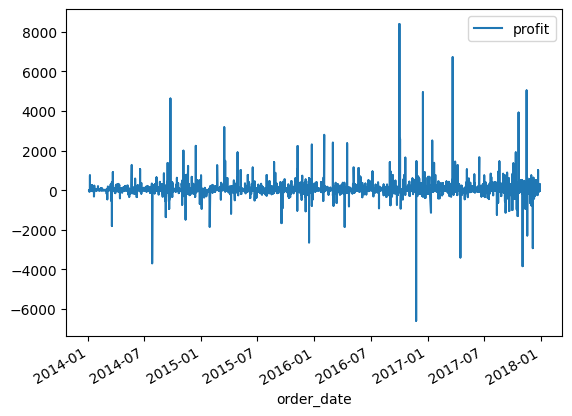

In [107]:
df.plot(kind="line",x="order_date",y="profit")

conclusion:
1. on 2016-11-25 recorded the highest loss to the store of 6599.9 USD.
2. on 2016-10-02 recorded the highest profit to the store of 8399.97 USD.

#### 3. Numerical vs Numerical

In [110]:
df.corr(numeric_only=True)

,postal_code,sales,quantity,discount,profit
postal_code,1.000000,-0.023851,0.012731,0.058471,-0.029968
sales,-0.023851,1.000000,0.200808,-0.028197,0.479067
quantity,0.012731,0.200808,1.000000,0.008680,0.066241
discount,0.058471,-0.028197,0.008680,1.000000,-0.219481
profit,-0.029968,0.479067,0.066241,-0.219481,1.000000


conclusion:
1. From the correlaton,profit and discount both are in negative weak correlation if discount increases profit decreases with respectively and vice-versa.
2. sales and profit both are in positive moderate correlation if sales increases profit also increases.

<Axes: xlabel='discount', ylabel='profit'>

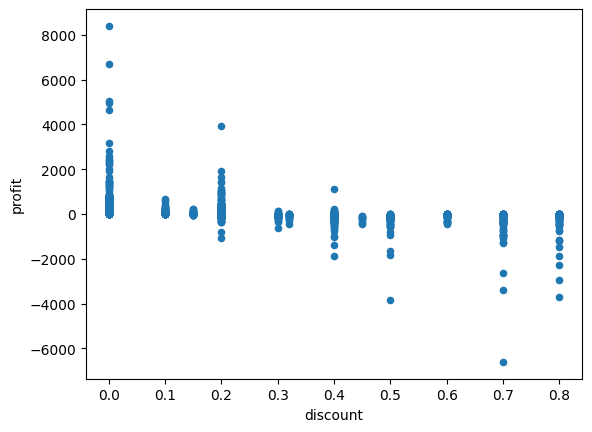

In [109]:
df.plot(kind="scatter",x= "discount",y="profit")

conclusion:
1. As the regression line is falling and the space between dots indicates the relation is negative weak.
2. if discount is increased, the profits for the store is decreased.

### Multivariate Analysis

Heatmap

<Axes: >

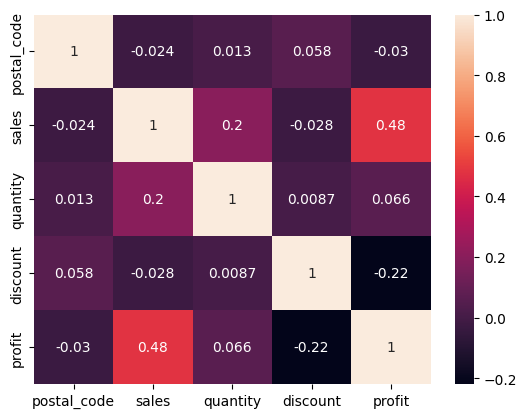

In [108]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

conclusion:
1. heatmap is used to find the relationship between the numerical features.As from the above, all values that are positive/negative describes the direction.
2. as strength is subjective in correlation,all the values between 0.8-1 describes the relashionship as strong.
3. if the value is 1,then relationship is perfect,0.5-0.8 means moderate and below 0.5 means weak/no relationship.
4. From the heatmap, the dark color always represents the weak relationship.
5. the light color represents the perfect relationship.